# Sentiment Analysis of Airline Reviews

In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import spacy
nlp = spacy.load('en_core_web_lg')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [2]:
# Panda display options
pd.set_option('display.max_colwidth', 70)

In [3]:
df = pd.read_csv('airline_df_cleaned.csv')
reviews = df[['Country','Airline','Review','Cleaned_Review']].copy(deep=True)
reviews.head()

,Country,Airline,Review,Cleaned_Review
0,China,Air China,los angeles beijing return food low quality staff appear when time...,los angeles beijing return food quality staff appear time mandator...
1,China,Air China,round trip from hong kong to munich the main reason for fly air ch...,round trip hong kong munich main reason fly air china no surprise ...
2,China,Air China,sydney beijing paris then rome beijing to sydney for a family holi...,sydney beijing paris rome beijing sydney family holiday 12hr fligh...
3,China,Air China,london to sydney return via beijing a cheap flight and live up to ...,london sydney return beijing cheap flight live cheap expectation f...
4,China,Air China,beijing to shanghai only one check in desk for standby passenger f...,beijing shanghai check desk standby passenger flight time 2 hour h...


In [4]:
reviews['Review'][61]

'hong kong to beijing want to fly hong kong to toronto direct but book flight with point and this routing be the only one available aircraft be an old and tired boeing 777 a bit dirty around the seat area we fly business and my foot rest be break and could not be adjust by the power button when the seat in front be in the full recline position it encroach onto my space quite a bit flight be set for 2 20pm and it leave on time and arrive in beijing 15 minute early good for I as I have a rather tight connection the snack be a salad and fried rice food be just barely adequate which I do not finish flight attendant speak some english enough to get by would not choose this airline unless I have no choice'

In [5]:
reviews['Cleaned_Review'][61]

'hong kong beijing fly hong kong toronto direct book flight point routing available aircraft tired boeing 777 bit dirty seat area fly business foot rest break not adjust power button seat recline position encroach space bit flight set 2 20pm leave time arrive beijing 15 minute I I tight connection snack salad fried rice food barely adequate I not finish flight attendant speak english not choose I no choice'

In [6]:
def remove_digits(text):
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Just extra clean up
    pattern = r'\b(\w+)\s+\1\b'
    text = re.sub(pattern, r'\1', text)
    return text

reviews['Review2'] = reviews['Review'].apply(remove_digits)

reviews['Cleaned_Review2'] = reviews['Cleaned_Review'].apply(remove_digits)

In [7]:
reviews['Cleaned_Review2'][61]

'hong kong beijing fly hong kong toronto direct book flight point routing available aircraft tired boeing bit dirty seat area fly business foot rest break not adjust power button seat recline position encroach space bit flight set 20pm leave time arrive beijing minute I tight connection snack salad fried rice food barely adequate I not finish flight attendant speak english not choose I no choice'

In [8]:
reviews['Review2'][61]

'hong kong to beijing want to fly hong kong to toronto direct but book flight with point and this routing be the only one available aircraft be an old and tired boeing a bit dirty around the seat area we fly business and my foot rest be break and could not be adjust by the power button when the seat in front be in the full recline position it encroach onto my space quite a bit flight be set for 20pm and it leave on time and arrive in beijing minute early good for I as I have a rather tight connection the snack be a salad and fried rice food be just barely adequate which I do not finish flight attendant speak some english enough to get by would not choose this airline unless I have no choice'

In [9]:
# Tokenizing the each review using word_tokenize
corpus = []
for i in range(0, len(reviews)):
    review = word_tokenize(reviews['Review2'][i])
    review = ' '.join(review)
    corpus.append(review)

In [10]:
corpus = [word_tokenize(x)for x in corpus]

In [11]:
# Building the Word2Vec model

gensim_model = Word2Vec(vector_size=100, window=5, min_count=2, workers=4, seed=42)

gensim_model.build_vocab(corpus)

gensim_model.train(corpus, total_examples=gensim_model.corpus_count, epochs=gensim_model.epochs)


(6838352, 9804465)

In [12]:
gensim_model.wv.most_similar('airline')

[('carrier', 0.7785829305648804),
 ('company', 0.7595584392547607),
 ('airlines', 0.7005898952484131),
 ('emirate', 0.5893980860710144),
 ('sq', 0.5572226643562317),
 ('review', 0.5466979742050171),
 ('ana', 0.5310202240943909),
 ('supercede', 0.5177459716796875),
 ('aspect', 0.5007749199867249),
 ('traveller', 0.49767833948135376)]

In [13]:
gensim_model.wv.similarity('india', 'china')

0.89901835

In [14]:
# Using ensemble of Vader and TextBlob to label the reviews as positive, negative or neutral

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

reviews['Vader_Sentiment1'] = reviews['Review2'].apply(sentiment_analyzer_scores)

# Creating a new column in the dataset to store the sentiment

reviews['sentiment1'] = reviews['Vader_Sentiment1'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))


In [15]:
# Using ensemble of Vader and TextBlob to label the reviews as positive, negative or neutral

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

reviews['Vader_Sentiment2'] = reviews['Cleaned_Review2'].apply(sentiment_analyzer_scores)

# Creating a new column in the dataset to store the sentiment

reviews['sentiment2'] = reviews['Vader_Sentiment2'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))


In [16]:
# Using TextBlob Sentiment Analyzer to get the sentiment scores

from textblob import TextBlob

# Creating a function to get the sentiment scores

def get_sentiment_scores3(sentence):
    score = TextBlob(sentence)
    return score.sentiment.polarity

# Creating a new column in the dataset to store the sentiment scores

reviews['sentiment_scores3'] = reviews['Review2'].apply(get_sentiment_scores3)

# Creating a new column in the dataset to store the sentiment

reviews['sentiment3'] = reviews['sentiment_scores3'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

In [17]:
# Using TextBlob Sentiment Analyzer to get the sentiment scores

from textblob import TextBlob

# Creating a function to get the sentiment scores

def get_sentiment_scores4(sentence):
    score = TextBlob(sentence)
    return score.sentiment.polarity

# Creating a new column in the dataset to store the sentiment scores

reviews['sentiment_scores4'] = reviews['Cleaned_Review2'].apply(get_sentiment_scores4)

# Creating a new column in the dataset to store the sentiment

reviews['sentiment4'] = reviews['sentiment_scores4'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

In [19]:
# Dropping the columns that are not required

reviews.drop(['Vader_Sentiment1','Vader_Sentiment2','sentiment_scores3','sentiment_scores4'], axis=1, inplace=True)

# Making a rule to select the final sentiment of the review

def get_final_sentiment(row):
    if row['sentiment1'] == row['sentiment2'] == row['sentiment3'] == row['sentiment4']:
        return row['sentiment1']
    elif row['sentiment1'] == row['sentiment2'] == row['sentiment3']:
        return row['sentiment1']
    elif row['sentiment1'] == row['sentiment2'] == row['sentiment4']:
        return row['sentiment1']
    elif row['sentiment1'] == row['sentiment3'] == row['sentiment4']:
        return row['sentiment1']
    elif row['sentiment2'] == row['sentiment3'] == row['sentiment4']:
        return row['sentiment2']
    elif row['sentiment1'] == row['sentiment2']:
        return row['sentiment1']
    elif row['sentiment1'] == row['sentiment3']:
        return row['sentiment1']
    elif row['sentiment1'] == row['sentiment4']:
        return row['sentiment1']
    elif row['sentiment2'] == row['sentiment3']:
        return row['sentiment2']
    elif row['sentiment2'] == row['sentiment4']:
        return row['sentiment2']
    elif row['sentiment3'] == row['sentiment4']:
        return row['sentiment3']
    else:
        return row['sentiment1']

In [23]:
# Making a rule to select the sentiment of the review and givign the priority to the Sentiment 1

def get_sentiment(row):
    if row['sentiment1'] == row['sentiment3']:
        return row['sentiment1']
    else:
        return row['sentiment1']
    
reviews['sentiment'] = reviews.apply(get_sentiment, axis=1)

In [25]:
# Droping the columns that are not required

reviews.drop(['sentiment1','sentiment2','sentiment3','sentiment4'], axis=1, inplace=True)

In [28]:
reviews.to_csv('airline_df_nlped.csv',index=False)

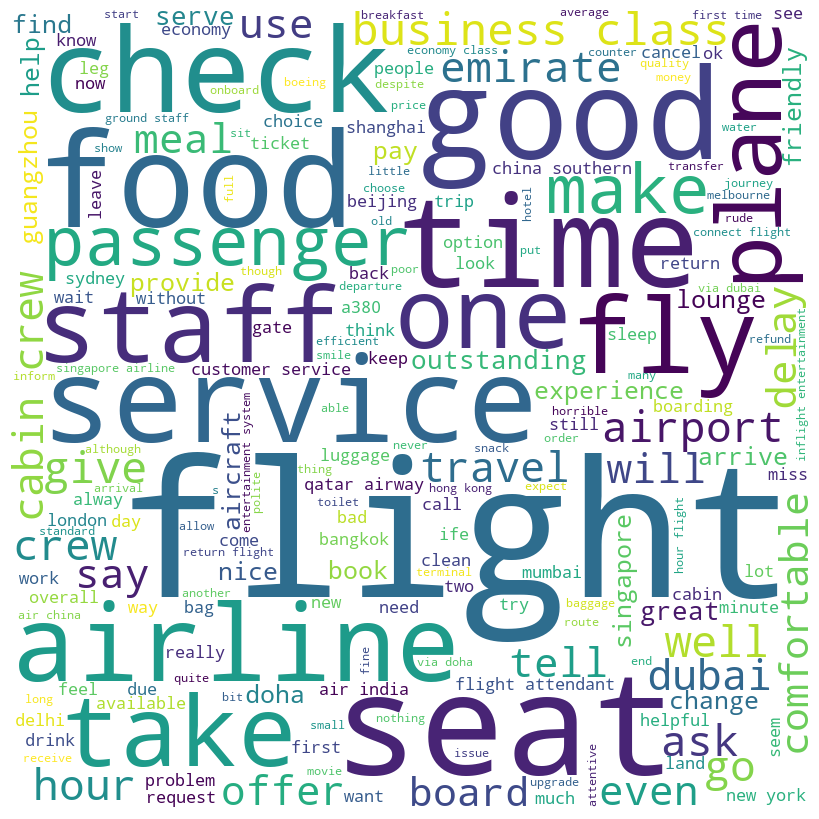

In [29]:
# Making a word cloud from the reviews2

corp = []

for i in range(0, len(reviews)):
    review = word_tokenize(reviews['Review2'][i])
    review = ' '.join(review)
    corp.append(review)
    
corp = [word_tokenize(x)for x in corp]

corp = [item for sublist in corp for item in sublist]

corp = ' '.join(corp)

corp

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(corp)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

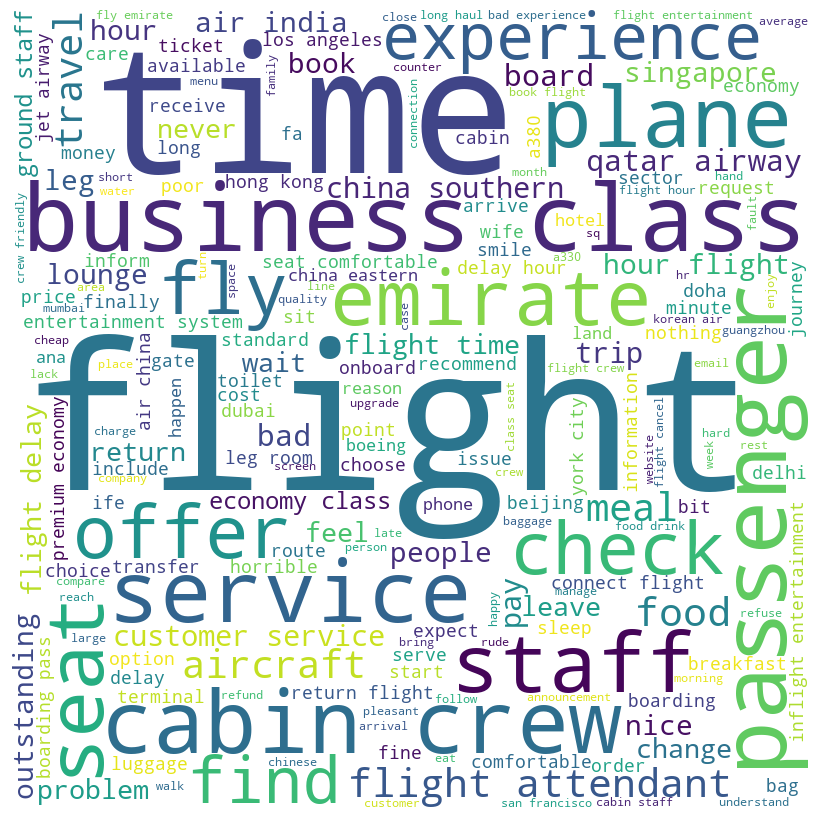

In [30]:
# Making a word cloud from the cleaned Cleaned_Review2

corp = []

for i in range(0, len(reviews)):
    review = word_tokenize(reviews['Cleaned_Review2'][i])
    review = ' '.join(review)
    corp.append(review)
    
corp = [word_tokenize(x) for x in corp]

corp = [item for sublist in corp for item in sublist]

corp = ' '.join(corp)

corp

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(corp)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()